In [1]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans (n_clusters = i, init ="k-means++")
  kmeans.fit(data.iloc[:,3:])
  wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Metthod')

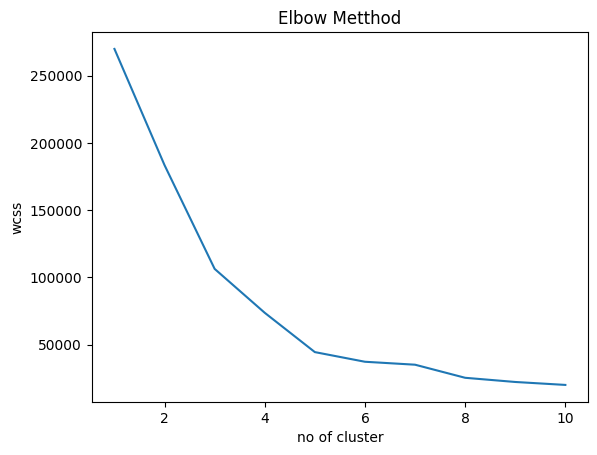

In [6]:
plt.plot(range(1,11),wcss)
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.title("Elbow Metthod")

In [7]:
km=KMeans(n_clusters=5)
km.fit(data.iloc[:,3:])
y_pred = km.predict(data.iloc[:,3:])
y_pred

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

Text(0.5, 1.0, 'Customer Segments')

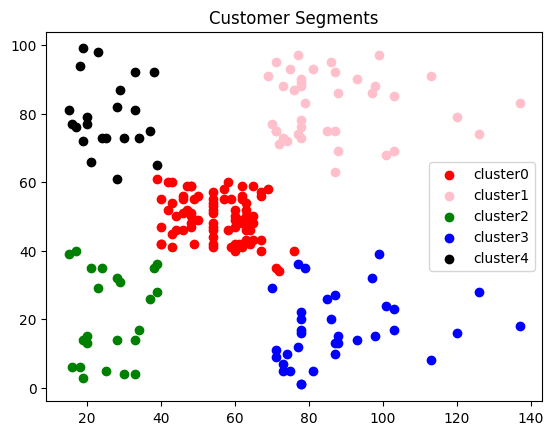

In [8]:
data["cluster"]=y_pred
df0=data[data["cluster"]==0]
df1=data[data["cluster"]==1]
df2=data[data["cluster"]==2]
df3=data[data["cluster"]==3]
df4=data[data["cluster"]==4]
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],c="red",label="cluster0")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c="pink",label="cluster1")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],c="green",label="cluster2")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],c="blue",label="cluster3")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],c="black",label="cluster4")
plt.legend()
plt.title("Customer Segments")